In [1]:
import urllib
urllib.request.urlretrieve("https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.tgz", "housing.tgz")

('housing.tgz', <http.client.HTTPMessage at 0x2001c887cf8>)

In [2]:
import tarfile
housing_tgz = tarfile.open("housing.tgz")
housing_tgz.extractall()
housing_tgz.close()

In [3]:
import pandas
housing = pandas.read_csv("housing.csv")
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

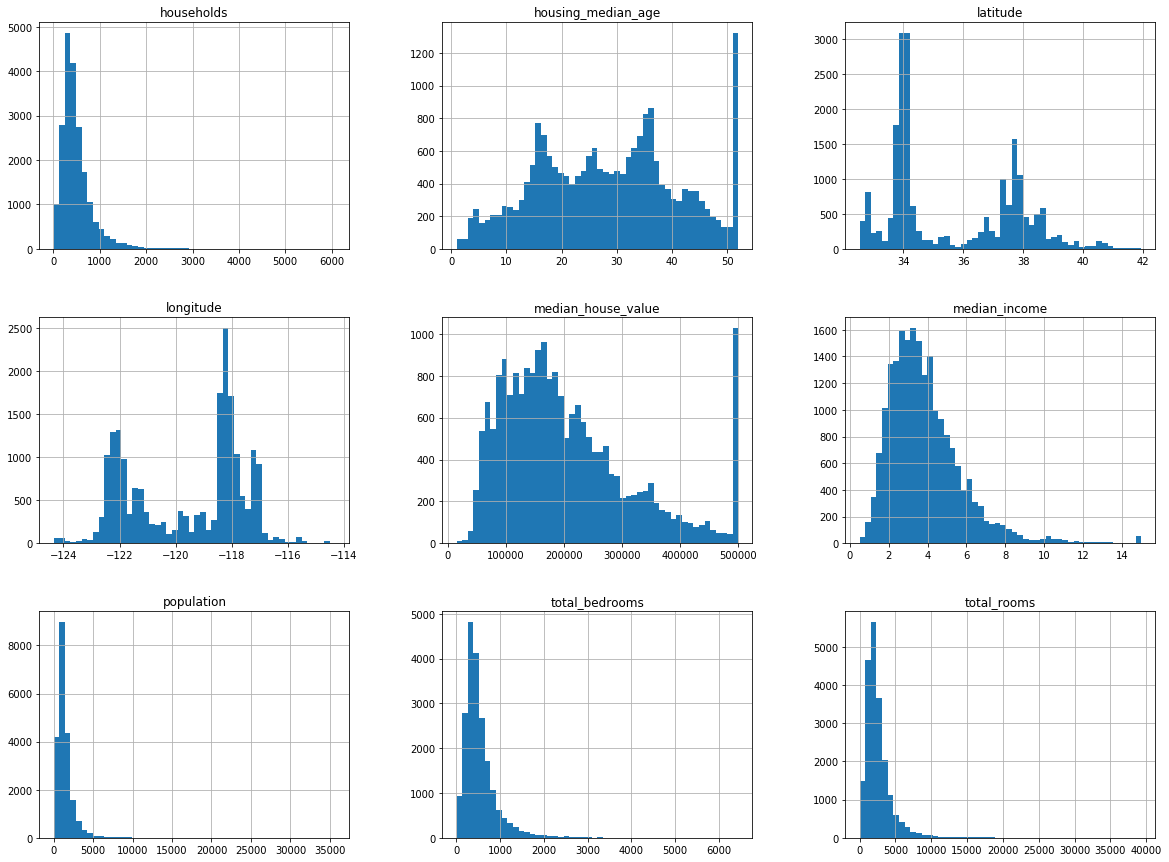

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt # This is for making a plot similar to one in MATLAB
housing.hist(bins=50, figsize=(20,15)) # Do you know why we choose 50 bins? Try playing with the number of bins and observe the difference.
plt.show()

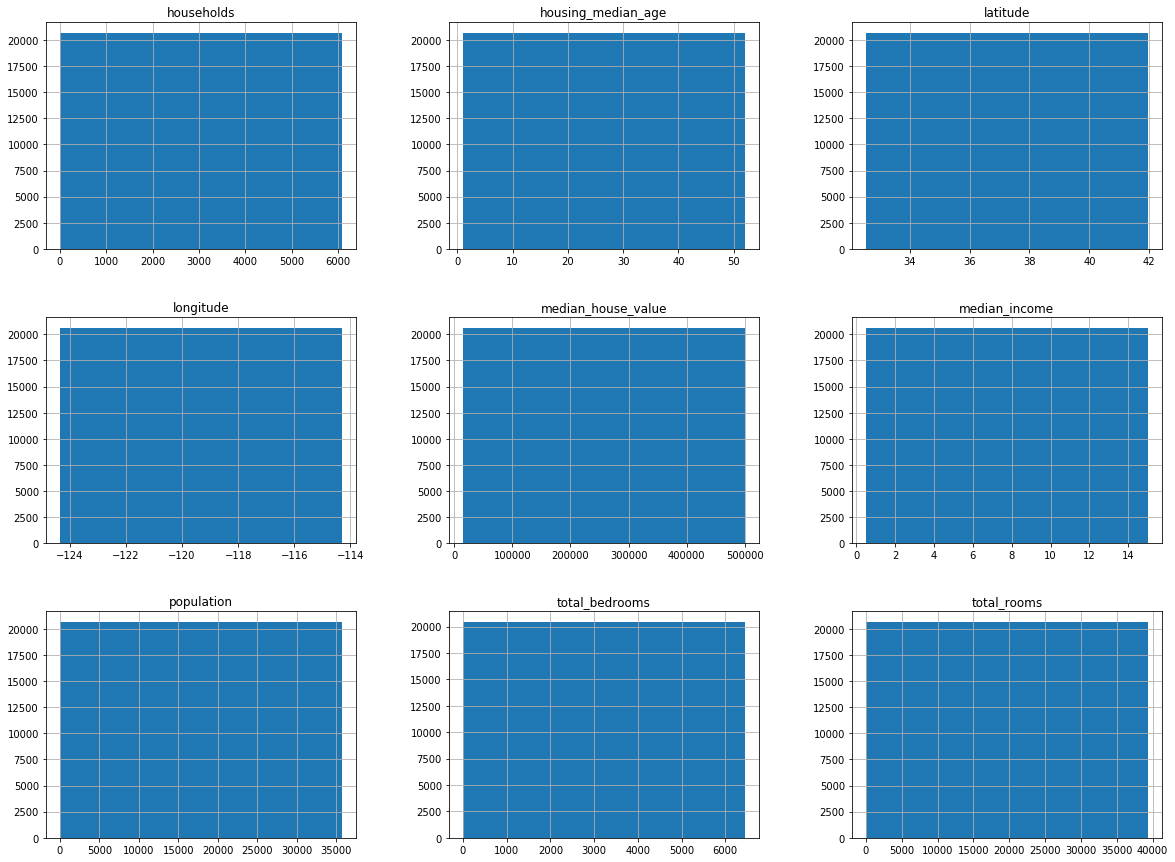

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt # This is for making a plot similar to one in MATLAB
housing.hist(bins=1, figsize=(20,15)) # Do you know why we choose 50 bins? Try playing with the number of bins and observe the difference.
plt.show()

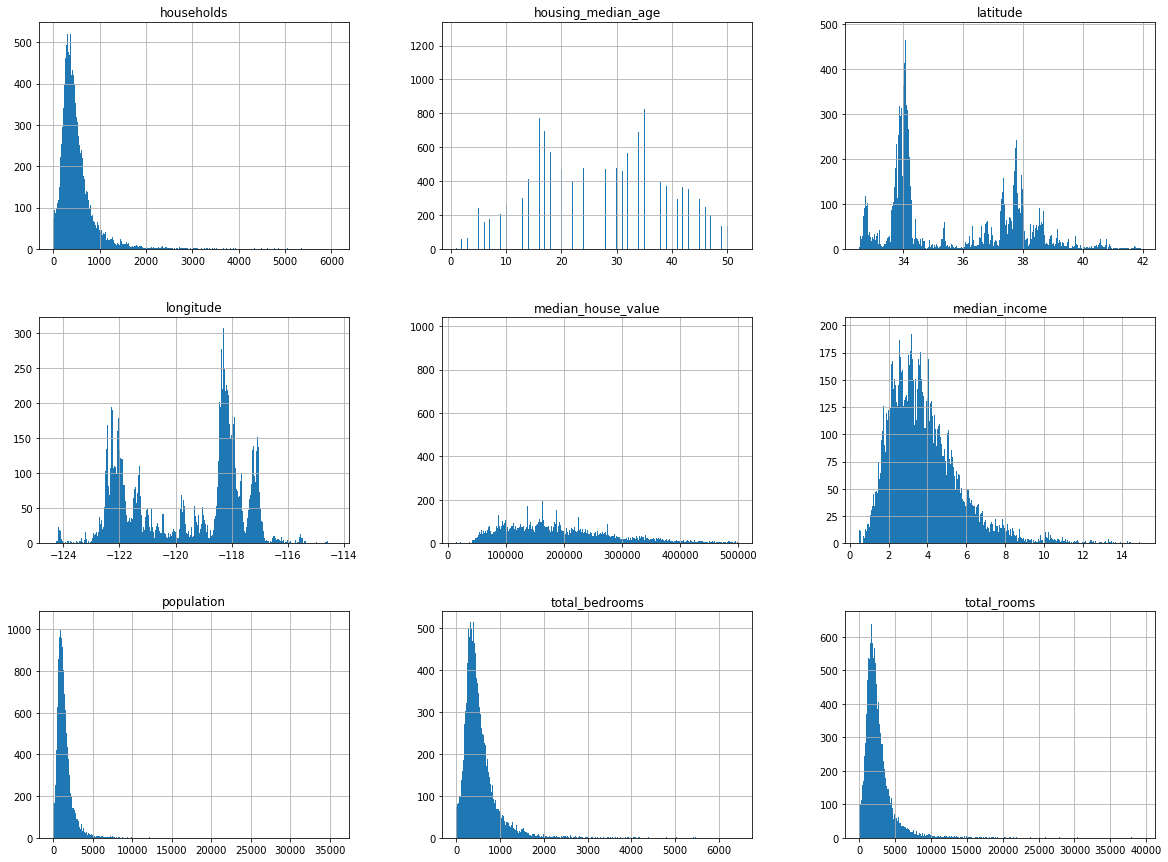

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt # This is for making a plot similar to one in MATLAB
housing.hist(bins=500, figsize=(20,15)) # Do you know why we choose 50 bins? Try playing with the number of bins and observe the difference.
plt.show()

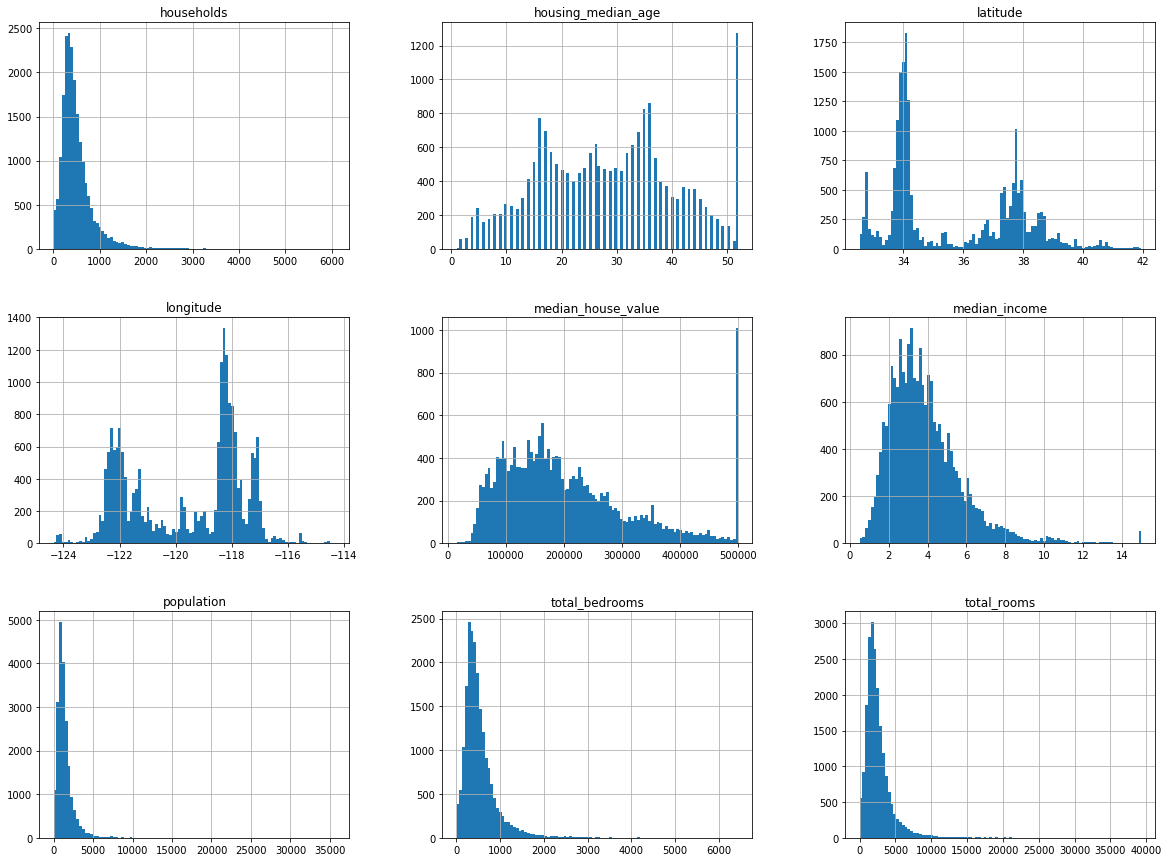

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt # This is for making a plot similar to one in MATLAB
housing.hist(bins=100, figsize=(20,15)) # Do you know why we choose 50 bins? Try playing with the number of bins and observe the difference.
plt.show()

In [11]:
fltr_idx = housing['total_bedrooms'].notna() & (housing['housing_median_age'] < 52) & (housing['median_house_value'] < 500001) # retrieve boolean array where each value corresponds to datapoint we want
fltr_housing = housing[fltr_idx].reset_index(drop=True) # select datapoints then reset its index
fltr_housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
3,-122.26,37.85,50.0,1120.0,283.0,697.0,264.0,2.1250,140000.0,NEAR BAY
4,-122.26,37.84,50.0,2239.0,455.0,990.0,419.0,1.9911,158700.0,NEAR BAY


In [12]:
fltr_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18379 entries, 0 to 18378
Data columns (total 10 columns):
longitude             18379 non-null float64
latitude              18379 non-null float64
housing_median_age    18379 non-null float64
total_rooms           18379 non-null float64
total_bedrooms        18379 non-null float64
population            18379 non-null float64
households            18379 non-null float64
median_income         18379 non-null float64
median_house_value    18379 non-null float64
ocean_proximity       18379 non-null object
dtypes: float64(9), object(1)
memory usage: 1.4+ MB


In [13]:
fltr_housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,18379.000000,18379.000000,18379.000000,18379.000000,18379.000000,18379.000000,18379.000000,18379.000000,18379.000000
mean,-119.484954,35.593833,26.969422,2669.597965,548.003972,1469.890690,508.613145,3.693698,189563.469014
std,1.980713,2.148148,11.433039,2227.810560,429.431372,1163.864204,389.550323,1.569676,95763.629783
min,-124.300000,32.540000,1.000000,2.000000,2.000000,3.000000,2.000000,0.499900,14999.000000
25%,-121.550000,33.920000,17.000000,1458.000000,300.000000,811.000000,284.000000,2.537000,115400.000000
50%,-118.450000,34.240000,27.000000,2142.000000,442.000000,1203.000000,416.000000,3.470500,171200.000000
75%,-117.970000,37.670000,36.000000,3182.000000,659.000000,1779.000000,614.000000,4.616700,243200.000000
max,-114.310000,41.950000,51.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500000.000000


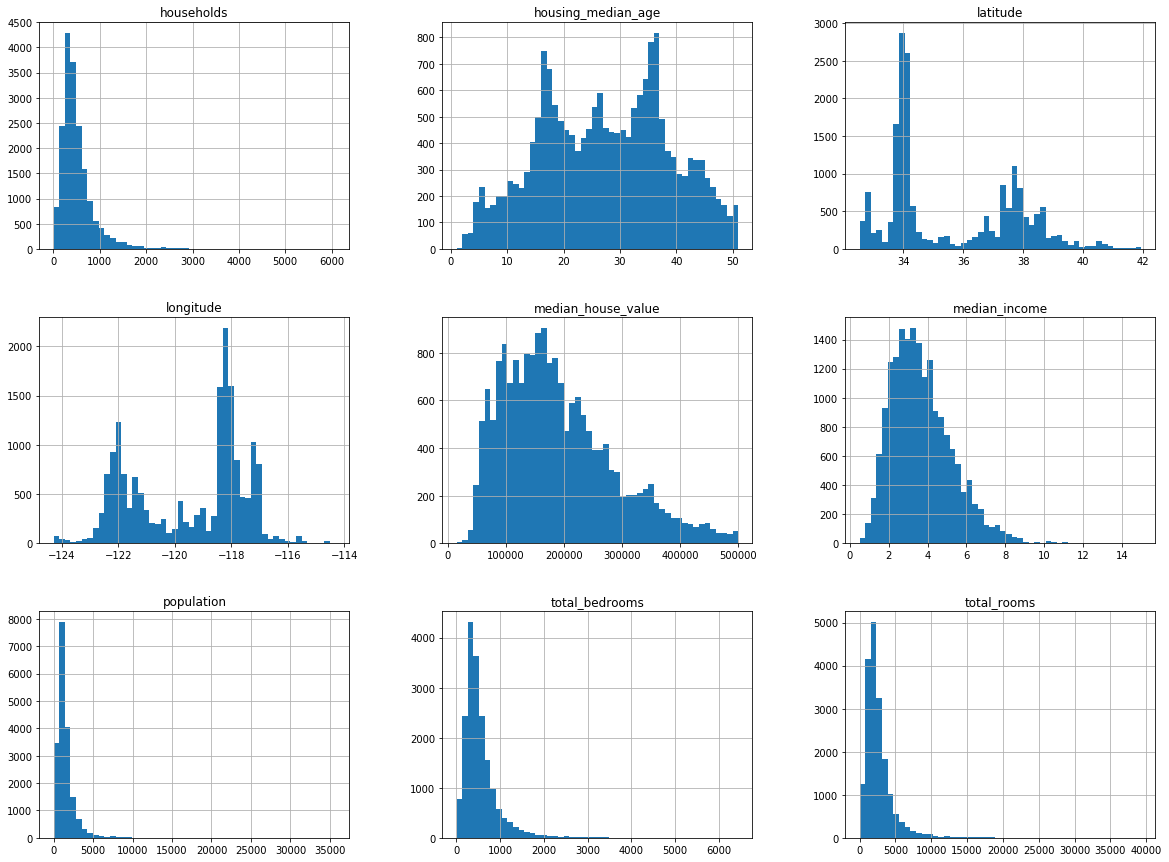

In [14]:
fltr_housing.hist(bins=50, figsize=(20,15)) # Do you know why we choose 50 bins? Try playing with the number of bins and observe the difference.
plt.show()

In [15]:
from sklearn.preprocessing import OneHotEncoder

encoded_cat, categories = fltr_housing["ocean_proximity"].factorize() # retrieve the attribute encoded as numbers
encoded_cat_arr = OneHotEncoder().fit_transform(encoded_cat.reshape(-1,1)).toarray() # transform sparse matrix to NumPy array
enc_fltr_housing = fltr_housing.iloc[:,0:9].copy()
for i in range(0, len(categories)):
    enc_fltr_housing[categories[i]] = encoded_cat_arr[:,i]
enc_fltr_housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,NEAR BAY,<1H OCEAN,INLAND,NEAR OCEAN,ISLAND
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,1.0,0.0,0.0,0.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,1.0,0.0,0.0,0.0,0.0
2,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,1.0,0.0,0.0,0.0,0.0
3,-122.26,37.85,50.0,1120.0,283.0,697.0,264.0,2.1250,140000.0,1.0,0.0,0.0,0.0,0.0
4,-122.26,37.84,50.0,2239.0,455.0,990.0,419.0,1.9911,158700.0,1.0,0.0,0.0,0.0,0.0


In [16]:
import numpy
rnd_indices = numpy.random.permutation(len(enc_fltr_housing)) # Generate a random sequence of housing's index
test_set_size = int(len(enc_fltr_housing) * 0.2) 
print(test_set_size, " datapoints for test set")

3675  datapoints for test set


In [17]:
test_indices = rnd_indices[:test_set_size]
train_indices = rnd_indices[test_set_size:]
print(test_indices, " ", len(test_indices))
print(train_indices, " ", len(train_indices))

[13450 16777 14096 ... 10100 14225 10420]   3675
[14257 11456  9941 ... 15594 13727 15095]   14704


In [18]:
test_set1 = enc_fltr_housing.iloc[test_indices].reset_index(drop=True) # Pick data out of housing according to the test indices
test_set1.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,NEAR BAY,<1H OCEAN,INLAND,NEAR OCEAN,ISLAND
0,-117.05,32.61,31.0,4033.0,715.0,2585.0,715.0,3.5096,139900.0,0.0,0.0,0.0,1.0,0.0
1,-122.03,38.27,24.0,3580.0,735.0,1959.0,731.0,2.7284,118500.0,0.0,0.0,1.0,0.0,0.0
2,-116.86,33.02,17.0,401.0,68.0,251.0,69.0,4.6518,170200.0,0.0,1.0,0.0,0.0,0.0
3,-117.21,32.84,34.0,2158.0,366.0,1046.0,335.0,4.5402,182100.0,0.0,0.0,0.0,1.0,0.0
4,-121.39,36.16,28.0,1057.0,249.0,288.0,130.0,3.0526,146900.0,0.0,0.0,0.0,1.0,0.0


In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lnr_regressor1 = LinearRegression()
lnr_regressor1.fit(train_set1.iloc[:, [idx for idx in range(len(train_set1.columns)) if idx != 8]], train_set1['median_house_value'])
prediction1 = lnr_regressor1.predict(test_set1.iloc[:, [idx for idx in range(len(test_set1.columns)) if idx != 8]])
print('RMSE = ', numpy.sqrt(mean_squared_error(test_set1['median_house_value'], prediction1)))

NameError: name 'train_set1' is not defined

In [20]:
train_set1 = enc_fltr_housing.iloc[train_indices].reset_index(drop=True) # Pick data out of housing according to the test indices
train_set1.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,NEAR BAY,<1H OCEAN,INLAND,NEAR OCEAN,ISLAND
0,-122.47,37.72,49.0,1690.0,307.0,770.0,294.0,4.5913,259700.0,0.0,0.0,0.0,1.0,0.0
1,-121.45,38.61,34.0,438.0,116.0,263.0,100.0,0.9379,67500.0,0.0,0.0,1.0,0.0,0.0
2,-117.90,33.80,23.0,1368.0,397.0,1940.0,358.0,3.0789,350000.0,0.0,1.0,0.0,0.0,0.0
3,-117.19,34.03,20.0,856.0,124.0,395.0,145.0,10.8634,381800.0,0.0,0.0,1.0,0.0,0.0
4,-122.28,38.00,26.0,2335.0,413.0,980.0,417.0,3.4471,178900.0,1.0,0.0,0.0,0.0,0.0


In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lnr_regressor1 = LinearRegression()
lnr_regressor1.fit(train_set1.iloc[:, [idx for idx in range(len(train_set1.columns)) if idx != 8]], train_set1['median_house_value'])
prediction1 = lnr_regressor1.predict(test_set1.iloc[:, [idx for idx in range(len(test_set1.columns)) if idx != 8]])
print('RMSE = ', numpy.sqrt(mean_squared_error(test_set1['median_house_value'], prediction1)))

RMSE =  59188.887001360694


In [22]:
lnr_regressor1 = LinearRegression()
lnr_regressor1.fit(train_set1.iloc[:, [idx for idx in range(len(train_set1.columns)) if idx != 69]], train_set1['median_house_value'])
prediction1 = lnr_regressor1.predict(test_set1.iloc[:, [idx for idx in range(len(test_set1.columns)) if idx != 69]])
print('RMSE = ', numpy.sqrt(mean_squared_error(test_set1['median_house_value'], prediction1)))

RMSE =  1.0720530550713512e-10


In [23]:
lnr_regressor1 = LinearRegression()
lnr_regressor1.fit(train_set1.iloc[:, [idx for idx in range(len(train_set1.columns)) if idx != 69999]], train_set1['median_house_value'])
prediction1 = lnr_regressor1.predict(test_set1.iloc[:, [idx for idx in range(len(test_set1.columns)) if idx != 69999]])
print('RMSE = ', numpy.sqrt(mean_squared_error(test_set1['median_house_value'], prediction1)))

RMSE =  1.0720530550713512e-10


In [24]:
lnr_regressor1 = LinearRegression()
lnr_regressor1.fit(train_set1.iloc[:, [idx for idx in range(len(train_set1.columns)) if idx != 8]], train_set1['median_house_value'])
prediction1 = lnr_regressor1.predict(test_set1.iloc[:, [idx for idx in range(len(test_set1.columns)) if idx != 8]])
print('RMSE = ', numpy.sqrt(mean_squared_error(test_set1['median_house_value'], prediction1)))

RMSE =  59188.887001360694


In [25]:
lnr_regressor1 = LinearRegression()
lnr_regressor1.fit(train_set1)
prediction1 = lnr_regressor1.predict(test_set1)
print('RMSE = ', numpy.sqrt(mean_squared_error(test_set1['median_house_value'], prediction1)))

TypeError: fit() missing 1 required positional argument: 'y'

In [26]:
train_set2 = train_set1.copy()
train_set2['room_per_house'] = train_set2['total_rooms']/train_set2['households']
train_set2['bedroom_per_room'] = train_set2['total_bedrooms']/train_set2['total_rooms']
train_set2['pop_per_house'] = train_set2['population']/train_set2['households']
train_set2.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,NEAR BAY,<1H OCEAN,INLAND,NEAR OCEAN,ISLAND,room_per_house,bedroom_per_room,pop_per_house
0,-122.47,37.72,49.0,1690.0,307.0,770.0,294.0,4.5913,259700.0,0.0,0.0,0.0,1.0,0.0,5.748299,0.181657,2.619048
1,-121.45,38.61,34.0,438.0,116.0,263.0,100.0,0.9379,67500.0,0.0,0.0,1.0,0.0,0.0,4.380000,0.264840,2.630000
2,-117.90,33.80,23.0,1368.0,397.0,1940.0,358.0,3.0789,350000.0,0.0,1.0,0.0,0.0,0.0,3.821229,0.290205,5.418994
3,-117.19,34.03,20.0,856.0,124.0,395.0,145.0,10.8634,381800.0,0.0,0.0,1.0,0.0,0.0,5.903448,0.144860,2.724138
4,-122.28,38.00,26.0,2335.0,413.0,980.0,417.0,3.4471,178900.0,1.0,0.0,0.0,0.0,0.0,5.599520,0.176874,2.350120


In [27]:
test_set2 = test_set1.copy()
test_set2['room_per_house'] = test_set2['total_rooms']/test_set2['households']
test_set2['bedroom_per_room'] = test_set2['total_bedrooms']/test_set2['total_rooms']
test_set2['pop_per_house'] = test_set2['population']/test_set2['households']
test_set2.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,NEAR BAY,<1H OCEAN,INLAND,NEAR OCEAN,ISLAND,room_per_house,bedroom_per_room,pop_per_house
0,-117.05,32.61,31.0,4033.0,715.0,2585.0,715.0,3.5096,139900.0,0.0,0.0,0.0,1.0,0.0,5.640559,0.177287,3.615385
1,-122.03,38.27,24.0,3580.0,735.0,1959.0,731.0,2.7284,118500.0,0.0,0.0,1.0,0.0,0.0,4.897401,0.205307,2.679891
2,-116.86,33.02,17.0,401.0,68.0,251.0,69.0,4.6518,170200.0,0.0,1.0,0.0,0.0,0.0,5.811594,0.169576,3.637681
3,-117.21,32.84,34.0,2158.0,366.0,1046.0,335.0,4.5402,182100.0,0.0,0.0,0.0,1.0,0.0,6.441791,0.169601,3.122388
4,-121.39,36.16,28.0,1057.0,249.0,288.0,130.0,3.0526,146900.0,0.0,0.0,0.0,1.0,0.0,8.130769,0.235572,2.215385


In [28]:
lnr_regressor2 = LinearRegression()
lnr_regressor2.fit(train_set2.iloc[:, [idx for idx in range(len(train_set2.columns)) if idx != 8]], train_set2['median_house_value'])
prediction2 = lnr_regressor2.predict(test_set2.iloc[:, [idx for idx in range(len(test_set2.columns)) if idx != 8]])
print('RMSE = ', numpy.sqrt(mean_squared_error(test_set2['median_house_value'], prediction2)))

RMSE =  58603.83118229583


In [29]:
from sklearn.ensemble import RandomForestRegressor

frst_regressor1 = RandomForestRegressor()
frst_regressor1.fit(train_set1.iloc[:, [idx for idx in range(len(train_set1.columns)) if idx != 8]], train_set1['median_house_value'])
prediction3 = frst_regressor1.predict(test_set1.iloc[:, [idx for idx in range(len(test_set1.columns)) if idx != 8]])
print('RMSE = ', numpy.sqrt(mean_squared_error(test_set1['median_house_value'], prediction3)))

C:\Users\vladc\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


RMSE =  46404.01237234553


In [30]:
from sklearn.ensemble import RandomForestRegressor

frst_regressor2 = RandomForestRegressor()
frst_regressor2.fit(train_set2.iloc[:, [idx for idx in range(len(train_set2.columns)) if idx != 8]], train_set2['median_house_value'])
prediction4 = frst_regressor2.predict(test_set2.iloc[:, [idx for idx in range(len(test_set2.columns)) if idx != 8]])
print('RMSE = ', numpy.sqrt(mean_squared_error(test_set2['median_house_value'], prediction4)))

RMSE =  46685.705412649186


In [77]:
frst_regressor2 = RandomForestRegressor()
frst_regressor2.fit(train_set2.iloc[:, [idx for idx in range(len(train_set2.columns)) if idx != 8 or idx != 3 or idx != 4 or idx != 5]], train_set2['median_house_value'])
prediction4 = frst_regressor2.predict(test_set2.iloc[:, [idx for idx in range(len(test_set2.columns)) if idx != 8 or idx != 3 or idx != 4 or idx != 5]])
print('RMSE = ', numpy.sqrt(mean_squared_error(test_set2['median_house_value'], prediction4)))

RMSE =  73.40169980793277


In [78]:
test_set2.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,NEAR BAY,<1H OCEAN,INLAND,NEAR OCEAN,ISLAND,room_per_house,bedroom_per_room,pop_per_house
0,-117.05,32.61,31.0,4033.0,715.0,2585.0,715.0,3.5096,139900.0,0.0,0.0,0.0,1.0,0.0,5.640559,0.177287,3.615385
1,-122.03,38.27,24.0,3580.0,735.0,1959.0,731.0,2.7284,118500.0,0.0,0.0,1.0,0.0,0.0,4.897401,0.205307,2.679891
2,-116.86,33.02,17.0,401.0,68.0,251.0,69.0,4.6518,170200.0,0.0,1.0,0.0,0.0,0.0,5.811594,0.169576,3.637681
3,-117.21,32.84,34.0,2158.0,366.0,1046.0,335.0,4.5402,182100.0,0.0,0.0,0.0,1.0,0.0,6.441791,0.169601,3.122388
4,-121.39,36.16,28.0,1057.0,249.0,288.0,130.0,3.0526,146900.0,0.0,0.0,0.0,1.0,0.0,8.130769,0.235572,2.215385


In [109]:
from sklearn.preprocessing import OneHotEncoder

def to_num(x):
    if x == "NEAR BAY":
        return 0.0
    elif x == "<1H OCEAN":
        return 1.0
    elif x == "INLAND":
        return 2.0
    elif x == "NEAR OCEAN":
        return 3.0
    else:
        return 4.0

fltr_housing["proximity"] = fltr_housing["ocean_proximity"].apply(to_num)
fltr_housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0.0
2,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY,0.0
3,-122.26,37.85,50.0,1120.0,283.0,697.0,264.0,2.1250,140000.0,NEAR BAY,0.0
4,-122.26,37.84,50.0,2239.0,455.0,990.0,419.0,1.9911,158700.0,NEAR BAY,0.0


In [126]:
frst_regressor2 = RandomForestRegressor()
frst_regressor2.fit(train_set2.iloc[:, [idx for idx in range(len(train_set2.columns)) if idx != 8 or idx != 3 or idx != 4 or idx != 5]], train_set2['median_house_value'])
prediction4 = frst_regressor2.predict(test_set2.iloc[:, [idx for idx in range(len(test_set2.columns)) if idx != 8 or idx != 3 or idx != 4 or idx != 5]])
print('RMSE = ', numpy.sqrt(mean_squared_error(test_set2['median_house_value'], prediction4)))

RMSE =  117.24466676874596
